In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\rakib\\Downloads\\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.value_counts().sum()

np.int64(918)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.shape

(918, 12)

In [8]:
df.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Age distribution**

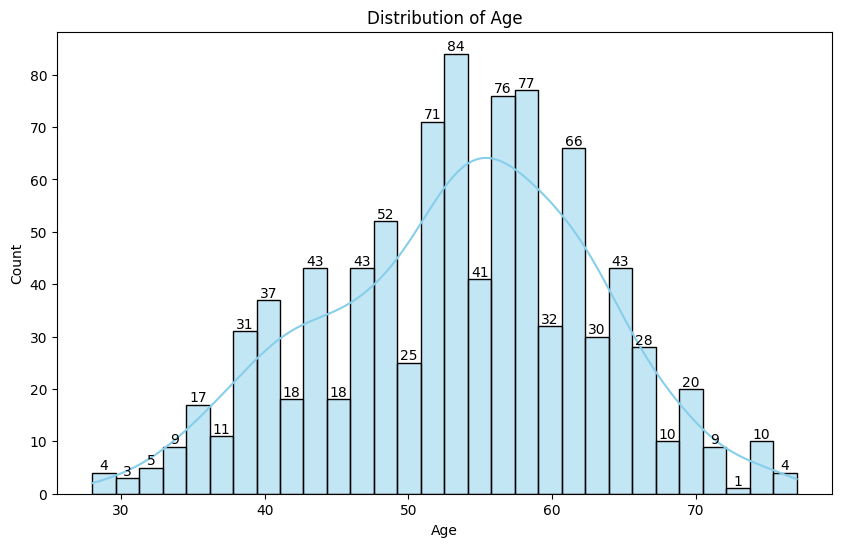

In [10]:
plt.figure(figsize=(10,6))
ax=sns.histplot(data=df, x='Age', bins= 30, kde = True, color = 'skyblue')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Sex ratio**

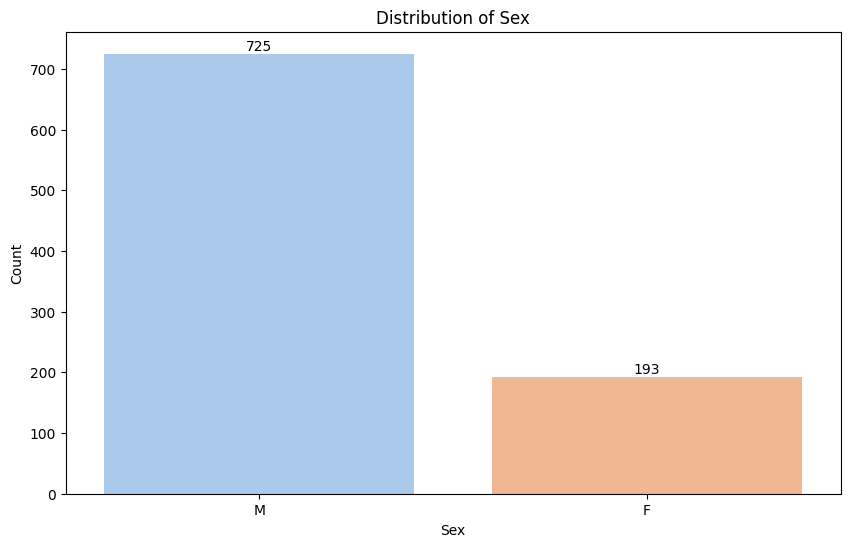

In [11]:
Sex = df['Sex'].value_counts()
plt.figure(figsize=(10,6))
bx=sns.barplot(x=Sex.index, y=Sex.values, palette='pastel')
for bar in bx.containers:
    bx.bar_label(bar)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

**Chest pain types**

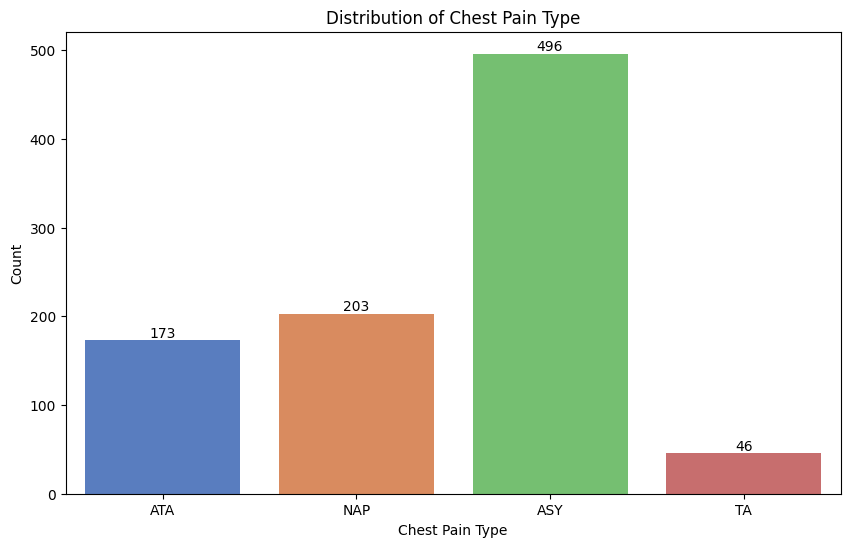

In [12]:
plt.figure(figsize=(10,6))
cx=sns.countplot(x='ChestPainType', data=df, palette='muted')
for bar in cx.containers:
    cx.bar_label(bar)
plt.title('Distribution of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

**HeartDisease vs Age**

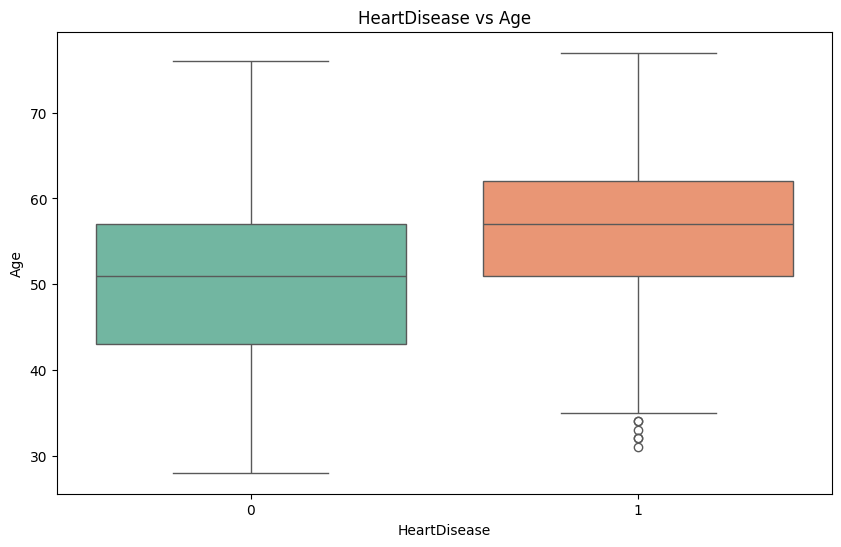

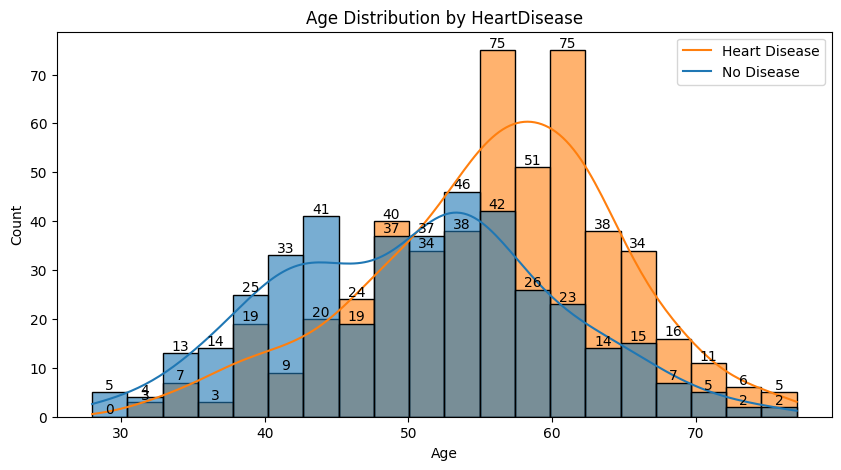

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Set2')
plt.title('HeartDisease vs Age')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 5))
dx= sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=20, alpha=0.6)
for bar in dx.containers:
    dx.bar_label(bar)
plt.title('Age Distribution by HeartDisease')
plt.legend(['Heart Disease', 'No Disease'])
plt.show()

**Cholesterol by ChestPainType**

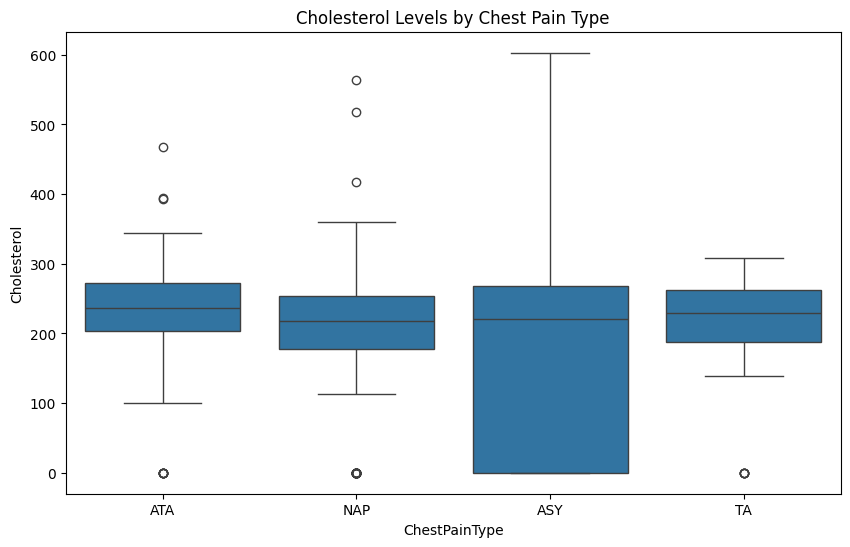

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ChestPainType', y='Cholesterol')
plt.title('Cholesterol Levels by Chest Pain Type')
plt.show()

**MaxHR vs HeartDisease**

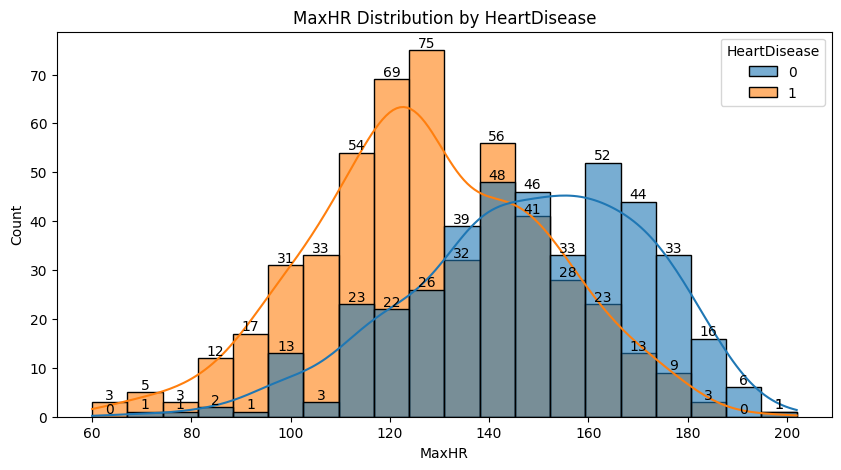

In [15]:
plt.figure(figsize=(10, 5))
ex=sns.histplot(data=df, x='MaxHR', hue='HeartDisease', kde=True, alpha=0.6)
for bar in ex.containers:
    ex.bar_label(bar)
plt.title('MaxHR Distribution by HeartDisease')
plt.show()


**ST_Slope vs HeartDisease**

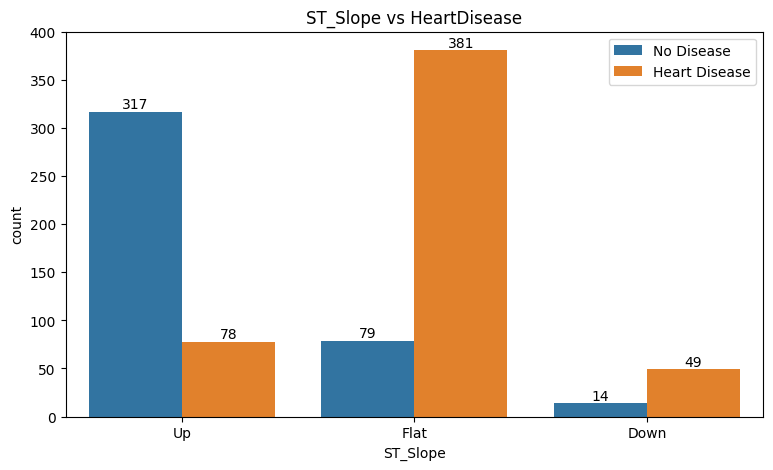

In [16]:
plt.figure(figsize=(9, 5))
fx=sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')
for bar in fx.containers:
    fx.bar_label(bar)
plt.title('ST_Slope vs HeartDisease')
plt.legend(['No Disease', 'Heart Disease'])
plt.show()

In [17]:
print("ST_Slope vs HeartDisease (counts):")
print(pd.crosstab(df['ST_Slope'], df['HeartDisease']))

ST_Slope vs HeartDisease (counts):
HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  381
Up            317   78


**Correlation of Age, Cholesterol, MaxHR with HeartDisease**

Correlation with HeartDisease:
HeartDisease    1.000000
Age             0.282039
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


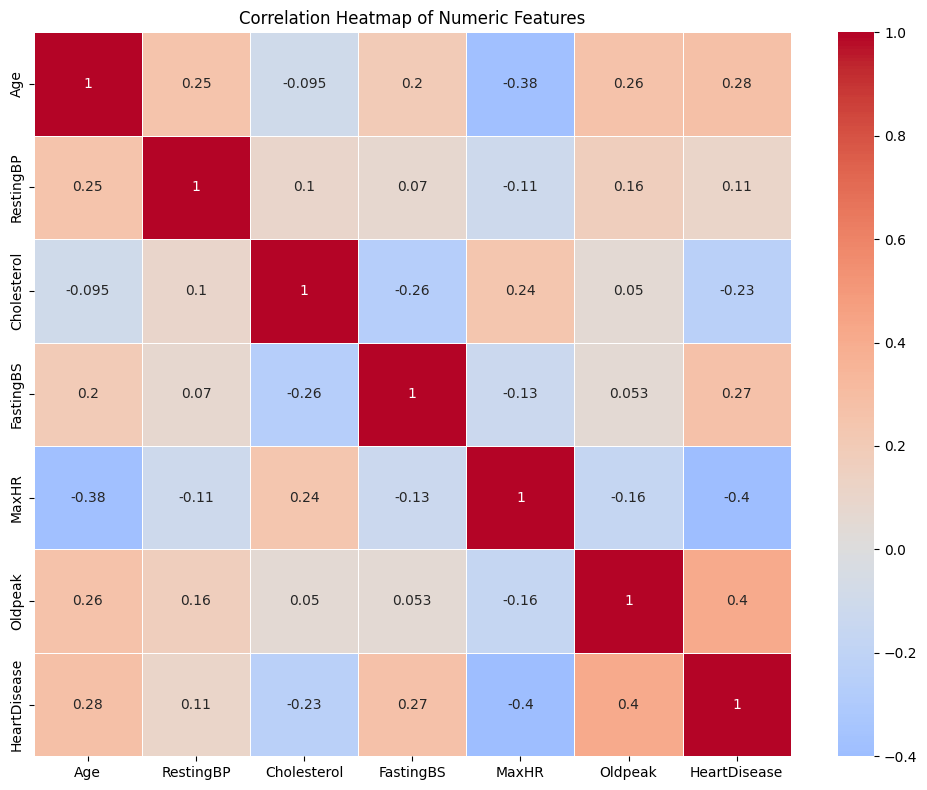

In [18]:
numeric_cols = ['Age', 'Cholesterol', 'MaxHR', 'HeartDisease']
corr_target = df[numeric_cols].corr()['HeartDisease'].sort_values(ascending=False)
print("Correlation with HeartDisease:")
print(corr_target)

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# **Feature Engineering**

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
cat_cols = ['ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina', 'Sex']
print("Cardinality of categorical features:")
for col in ['ChestPainType', 'RestingECG', 'ST_Slope', 'Sex', 'ExerciseAngina']:
    print(f"{col:15}: {df[col].nunique()} unique values → {df[col].unique()}")

Cardinality of categorical features:
ChestPainType  : 4 unique values → ['ATA' 'NAP' 'ASY' 'TA']
RestingECG     : 3 unique values → ['Normal' 'ST' 'LVH']
ST_Slope       : 3 unique values → ['Up' 'Flat' 'Down']
Sex            : 2 unique values → ['M' 'F']
ExerciseAngina : 2 unique values → ['N' 'Y']


In [21]:
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG'], 
                            prefix=['CPT', 'ECG'], drop_first=True)

In [22]:
df_encoded['ST_Slope'] = df_encoded['ST_Slope'].map({'Down': 0, 'Flat': 1, 'Up': 2})
df_encoded['ExerciseAngina'] = df_encoded['ExerciseAngina'].map({'N': 0, 'Y': 1})
df_encoded['Sex'] = df_encoded['Sex'].map({'M': 1, 'F': 0})

In [23]:
scaler = StandardScaler()
scale_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

df_scaled = df_encoded.copy()
df_scaled[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

print(f"\nAfter scaling → Oldpeak mean: {df_scaled['Oldpeak'].mean():.3f}, std: {df_scaled['Oldpeak'].std():.3f}")


After scaling → Oldpeak mean: 0.000, std: 1.001


In [24]:
df_risk = df_scaled.copy()

df_risk['RiskScore'] = (
    df_risk['Age'] * 0.4 +
    df_risk['Cholesterol'] * 0.3 +
    (-df_risk['MaxHR']) * 0.3   # negative because lower MaxHR = higher risk
)

print("RiskScore statistics:")
print(df_risk['RiskScore'].describe())

RiskScore statistics:
count    9.180000e+02
mean    -2.012430e-16
std      6.056237e-01
min     -1.833854e+00
25%     -3.923615e-01
50%      3.018407e-02
75%      4.249660e-01
max      1.701183e+00
Name: RiskScore, dtype: float64


**Compare correlation with target**

In [25]:
print(f"\nCorrelation with HeartDisease:")
print(f"Age         : {df_risk['Age'].corr(df_risk['HeartDisease']):.3f}")
print(f"Cholesterol : {df_risk['Cholesterol'].corr(df_risk['HeartDisease']):.3f}")
print(f"MaxHR       : {df_risk['MaxHR'].corr(df_risk['HeartDisease']):.3f}")
print(f"RiskScore   : {df_risk['RiskScore'].corr(df_risk['HeartDisease']):.3f} ← Strongest!")


Correlation with HeartDisease:
Age         : 0.282
Cholesterol : -0.233
MaxHR       : -0.400
RiskScore   : 0.269 ← Strongest!


# **Apply ML**

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

In [27]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
}

In [30]:
results = []
predictions = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n" + "="*80)
print("MODEL TRAINING & EVALUATION")
print("="*80)

for name, model in models.items():
    print(f"\n→ Training {name}...")
    
    # Fit
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Cross-validation AUC
    cv_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'ROC-AUC (Test)': auc,
        'ROC-AUC (5-fold CV)': cv_auc
    })
    
    predictions[name] = (y_pred, y_proba)
    
    print(f"   Accuracy: {acc:.4f} | F1: {f1:.4f} | AUC: {auc:.4f} | CV-AUC: {cv_auc:.4f}")


MODEL TRAINING & EVALUATION

→ Training Logistic Regression...
   Accuracy: 0.8750 | F1: 0.8900 | AUC: 0.9005 | CV-AUC: 0.9157

→ Training Random Forest...
   Accuracy: 0.8913 | F1: 0.9029 | AUC: 0.9336 | CV-AUC: 0.9269

→ Training SVM (RBF)...
   Accuracy: 0.7174 | F1: 0.7426 | AUC: 0.7972 | CV-AUC: 0.7850


**Performance Comparison table**

In [31]:
results_df = pd.DataFrame(results).round(4)
results_df = results_df.sort_values('ROC-AUC (Test)', ascending=False)

print("\n" + "="*80)
print("21. FINAL PERFORMANCE RANKING")
print("="*80)
print(results_df[['Model', 'Accuracy', 'F1-Score', 'ROC-AUC (Test)', 'ROC-AUC (5-fold CV)']].to_string(index=False))

# Best model
best_model_name = results_df.iloc[0]['Model']
print(f"\nWINNER: {best_model_name}")


21. FINAL PERFORMANCE RANKING
              Model  Accuracy  F1-Score  ROC-AUC (Test)  ROC-AUC (5-fold CV)
      Random Forest    0.8913    0.9029          0.9336               0.9269
Logistic Regression    0.8750    0.8900          0.9005               0.9157
          SVM (RBF)    0.7174    0.7426          0.7972               0.7850

WINNER: Random Forest


**SMOTE Oversampling Effect**

In [32]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [33]:
# Retrain best model with SMOTE
rf_smote = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf_smote.fit(X_smote, y_smote)
y_pred_smote = rf_smote.predict(X_test)
y_proba_smote = rf_smote.predict_proba(X_test)[:, 1]

acc_smote = accuracy_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
auc_smote = roc_auc_score(y_test, y_proba_smote)

In [34]:
print(f"\nRandom Forest + SMOTE:")
print(f"   Accuracy: {acc_smote:.4f} (↑ {acc_smote - results_df[results_df['Model']=='Random Forest']['Accuracy'].values[0]:+.4f})")
print(f"   F1-Score: {f1_smote:.4f} (↑ {f1_smote - results_df[results_df['Model']=='Random Forest']['F1-Score'].values[0]:+.4f})")
print(f"   ROC-AUC : {auc_smote:.4f} (↑ {auc_smote - results_df[results_df['Model']=='Random Forest']['ROC-AUC (Test)'].values[0]:+.4f})")


Random Forest + SMOTE:
   Accuracy: 0.9022 (↑ +0.0109)
   F1-Score: 0.9109 (↑ +0.0080)
   ROC-AUC : 0.9431 (↑ +0.0095)


# **Apply DLA**

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
model_simple = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [37]:
# define EarlyStopping callback (es) to avoid NameError
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'auc'])
history_simple = model_simple.fit(X_train, y_train, epochs=100, batch_size=32,
                                  validation_split=0.2, verbose=0, callbacks=[es])

y_pred_simple = (model_simple.predict(X_test) > 0.5).astype(int)
# ensure predictions are 1D for roc_auc_score
auc_simple = roc_auc_score(y_test, model_simple.predict(X_test).ravel())

print(f"Simple ANN → Accuracy: {accuracy_score(y_test, y_pred_simple):.4f}, "
      f"F1: {f1_score(y_test, y_pred_simple):.4f}, AUC: {auc_simple:.4f}")

Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 36.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Simple ANN → Accuracy: 0.8750, F1: 0.8900, AUC: 0.9197


In [38]:
results_layers = []

for depth in [2, 3, 4, 5, 6]:
    print(f"Testing {depth} hidden layers...", end="")
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(depth-1):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_split=0.2, verbose=0, callbacks=[es])
    
    auc_test = roc_auc_score(y_test, model.predict(X_test, verbose=0))
    results_layers.append({'Layers': depth+1, 'AUC': auc_test})  # +1 for output
    print(f" → AUC: {auc_test:.4f}")

Testing 2 hidden layers...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7884
Testing 3 hidden layers...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7857
Testing 4 hidden layers...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7689
Testing 5 hidden layers...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7755
Testing 6 hidden layers...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7761


**DROPOUT REGULARIZATION EFFECT**

In [39]:
model_no_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_with_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [40]:
model_no_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])

h1 = model_no_dropout.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0, callbacks=[es])
h2 = model_with_dropout.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0, callbacks=[es])

auc_no = roc_auc_score(y_test, model_no_dropout.predict(X_test, verbose=0))
auc_yes = roc_auc_score(y_test, model_with_dropout.predict(X_test, verbose=0))

print(f"No Dropout  → Val AUC peak: {max(h1.history['val_auc']):.4f}, Test AUC: {auc_no:.4f}")
print(f"With Dropout → Val AUC peak: {max(h2.history['val_auc']):.4f}, Test AUC: {auc_yes:.4f}")

Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
No Dropout  → Val AUC peak: 0.7839, Test AUC: 0.8006
With Dropout → Val AUC peak: 0.7238, Test AUC: 0.8140


**Plot training curves**

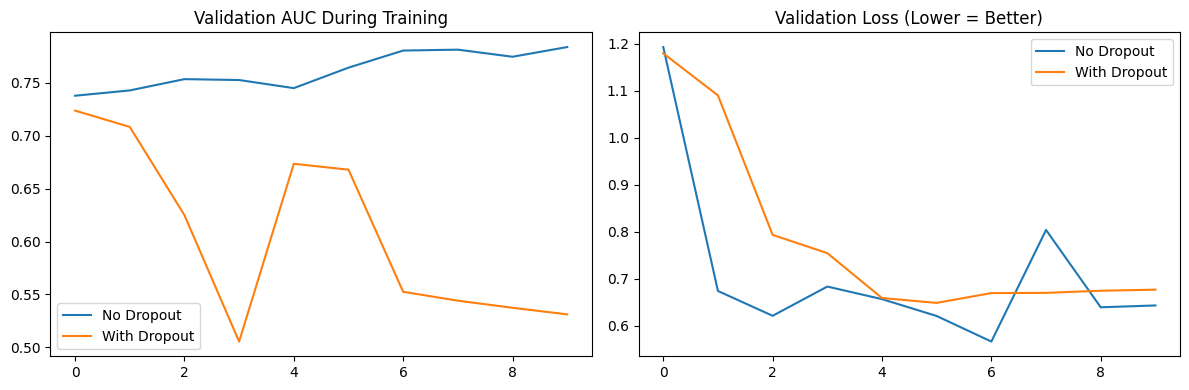

In [41]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h1.history['val_auc'], label='No Dropout')
plt.plot(h2.history['val_auc'], label='With Dropout')
plt.title('Validation AUC During Training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h1.history['val_loss'], label='No Dropout')
plt.plot(h2.history['val_loss'], label='With Dropout')
plt.title('Validation Loss (Lower = Better)')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
activations = ['relu', 'tanh', 'sigmoid', 'selu']
results_act = []

for act in activations:
    print(f"Testing {act}...", end="")
    model = Sequential([
        Dense(64, activation=act, input_shape=(X_train.shape[1],)),
        Dense(32, activation=act),
        Dense(16, activation=act),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                        verbose=0, callbacks=[es])
    auc = roc_auc_score(y_test, model.predict(X_test, verbose=0))
    results_act.append({'Activation': act, 'Test AUC': auc})
    print(f" → AUC: {auc:.4f}")

df_act = pd.DataFrame(results_act).sort_values('Test AUC', ascending=False)
print("\nActivation Function Ranking:")
print(df_act)

Testing relu...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.4901
Testing tanh...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7801
Testing sigmoid...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7443
Testing selu...Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
 → AUC: 0.7960

Activation Function Ranking:
  Activation  Test AUC
3       selu  0.796031
1       tanh  0.780129
2    sigmoid  0.744261
0       relu  0.490077


**FINAL BEST NEURAL NETWORK**

In [43]:
best_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'auc'])
history_best = best_model.fit(X_train, y_train, validation_split=0.2, epochs=200,
                              batch_size=32, verbose=0, callbacks=[es])

y_pred_best = (best_model.predict(X_test) > 0.5).astype(int)
final_auc = roc_auc_score(y_test, best_model.predict(X_test))

print(f"\nFINAL BEST ANN:")
print(f"   Accuracy : {accuracy_score(y_test, y_pred_best):.4f}")
print(f"   F1-Score : {f1_score(y_test, y_pred_best):.4f}")
print(f"   ROC-AUC  : {final_auc:.4f}")

Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

FINAL BEST ANN:
   Accuracy : 0.5543
   F1-Score : 0.7133
   ROC-AUC  : 0.5256
